In [1]:
%cd ..

c:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import logging
logging.basicConfig(level=logging.INFO)


Iris dataset
==

In [3]:
df_iris_orig = pd.read_csv("data/iris.csv")
df_iris = df_iris_orig.drop(columns=["species"])

In [4]:

c_iris = bb.CART(df_iris, None, metrics_type="clustering", max_depth=2)
c_iris.create_tree()
p = c_iris.predict(df_iris)

A tree with 4 leafs was created


c:\Users\susanne\git\binarybeech\binarybeech\math.py:131: RuntimeWarning: divide by zero encountered in log2
  return -np.sum(hist * np.log2(hist))
c:\Users\susanne\git\binarybeech\binarybeech\math.py:131: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(hist * np.log2(hist))


In [5]:
c_iris.tree.traverse(df_iris.iloc[0]).value
df_iris["species"]

'cluster ca833393-1264-436b-804f-fd55d3e597f7'

In [9]:
import matplotlib.pyplot as plt
colors = {"setosa":"red", "versicolor":"blue", "virginica":"green"}
plt.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris["species"].map(colors))


KeyError: 'species'

In [ ]:

x, y = np.meshgrid(np.linspace(1,7,11),np.linspace(0,2.5,11))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree.traverse(d).value)
for i in range(len(col)):
    if col[i] == "setosa":
        col[i] = 0
    if col[i] == "versicolor":
        col[i] = 1
    if col[i] == "virginica":
        col[i] = 2
z = np.array(col).reshape(x.shape)

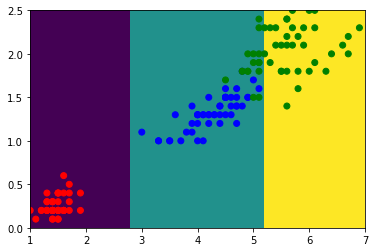

In [ ]:
fig, ax = plt.subplots()
ax.pcolormesh(x,y,z)
ax.scatter(df_iris["petal_length"],df_iris["petal_width"],c=df_iris["species"].map(colors))

In [ ]:
c_iris.validate()

ValueError: could not convert string to float: 'setosa'

A tree with 9 leafs was created
A tree with 9 leafs was created


c:\Users\susanne\git\binarybeech\binarybeech\metrics.py:86: RuntimeWarning: invalid value encountered in true_divide
  return np.diag(m) / np.sum(m, axis=0)


A tree with 8 leafs was created
A tree with 8 leafs was created
A tree with 9 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.003849001794597503


A tree with 8 leafs was created
A tree with 9 leafs was created


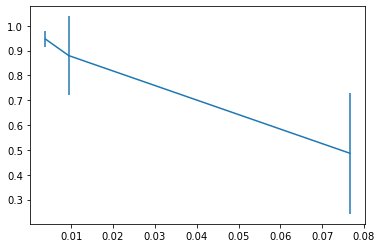

In [ ]:
c_iris.train()

In [ ]:
import binarybeech.utils
binarybeech.utils.print_tree(c_iris.tree)

petal_length<2.39
├── False:petal_width<1.64
│   ├── False:virginica
│   └── True: petal_length<4.94
│       ├── False:virginica
│       └── True: versicolor
└── True: setosa



In [ ]:
c_iris.validate()

{'precision': array([1.  , 0.94, 1.  ]),
 'recall': array([1.        , 1.        , 0.94339623]),
 'F-score': 0.9799819837854069,
 'accuracy': 0.98}